In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Sample dataset
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores':        [35, 40, 50, 52, 60, 62, 70, 75, 85, 90]
}

df = pd.DataFrame(data)

# Splitting features and target
X = df[['Hours_Studied']]  # Independent variable
y = df['Scores']           # Dependent variable

# Creating and training the model
model = LinearRegression()
model.fit(X, y)

# Predicting
df['Predicted_Score'] = model.predict(X)

# Calculating slope and intercept
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

# Average of predicted scores
print("Average Predicted Score:", df['Predicted_Score'].mean())

# --------------------------------------------
# 🔹 Visualization 1: Actual vs Predicted Line Plot
plt.figure(figsize=(8, 5))
sns.lineplot(x='Hours_Studied', y='Scores', data=df, marker='o', label='Actual')
sns.lineplot(x='Hours_Studied', y='Predicted_Score', data=df, marker='o', label='Predicted')
plt.title("Actual vs Predicted Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.legend()
plt.grid()
plt.show()

# 🔹 Visualization 2: Regression Line
plt.figure(figsize=(8, 5))
sns.regplot(x='Hours_Studied', y='Scores', data=df, ci=None, line_kws={"color": "red"})
plt.title("Regression Line using Seaborn")
plt.grid()
plt.show()

# 🔹 Visualization 3: Scatter with fitted line using Matplotlib
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Simple Linear Regression (Matplotlib)')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Practice_Tests': [0, 1, 1, 2, 2, 3, 3, 4, 4, 5],
    'Attendance': [60, 62, 65, 68, 70, 75, 78, 80, 85, 90],
    'Final_Score': [40, 45, 50, 55, 60, 65, 70, 75, 85, 90]
}

df = pd.DataFrame(data)

# Splitting features (X) and target (y)
X = df[['Hours_Studied', 'Practice_Tests', 'Attendance']]
y = df['Final_Score']

# Creating and training the model
model = LinearRegression()
model.fit(X, y)

# Making predictions
df['Predicted_Score'] = model.predict(X)

# Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# ----------------------------------------
# 🔹 Visualization 1: Actual vs Predicted Scores
plt.figure(figsize=(8,5))
sns.lineplot(data=df[['Final_Score', 'Predicted_Score']], markers=True)
plt.title("Actual vs Predicted Final Scores")
plt.xlabel("Student Index")
plt.ylabel("Score")
plt.grid()
plt.show()

# 🔹 Visualization 2: Heatmap of Correlation
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 🔹 Visualization 3: 3D Plot (Optional - needs mpl_toolkits)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Hours_Studied'], df['Attendance'], y, c='blue', label='Actual')
ax.scatter(df['Hours_Studied'], df['Attendance'], df['Predicted_Score'], c='red', label='Predicted')
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Attendance')
ax.set_zlabel('Final Score')
ax.set_title('3D Plot: Actual vs Predicted')
ax.legend()
plt.show()


In [ ]:
# Install necessary libraries (if not already installed)
# pip install pandas matplotlib statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Sample monthly sales data
sales_data = [250, 265, 270, 300, 320, 330, 340, 360, 390, 400, 420, 450,
              460, 470, 500, 520, 530, 550, 580, 600, 610, 640, 660, 690]

# Create time series DataFrame
df = pd.DataFrame(sales_data, columns=['Sales'])
df.index = pd.date_range(start='2022-01', periods=len(df), freq='M')

# Plot original data
plt.figure(figsize=(8, 4))
plt.plot(df, label='Original Sales')
plt.title("Monthly Sales Data")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid()
plt.legend()
plt.show()

# ------------------------------------
# Fit ARIMA model (p=1, d=1, q=1)
model = ARIMA(df, order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast the next 6 months
forecast = model_fit.forecast(steps=6)
print("\nForecasted Sales for Next 6 Months:\n", forecast)

# Plot the forecast
plt.figure(figsize=(8, 4))
plt.plot(df, label='Original Sales')
plt.plot(pd.date_range(start=df.index[-1]+pd.offsets.MonthEnd(1), periods=6, freq='M'),
         forecast, color='red', marker='o', label='Forecast')
plt.title("Sales Forecast using ARIMA")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid()
plt.legend()
plt.show()


In [ ]:
# Install if not already installed:
# pip install pmdarima

import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

# Sample sales data again
sales_data = [250, 265, 270, 300, 320, 330, 340, 360, 390, 400, 420, 450,
              460, 470, 500, 520, 530, 550, 580, 600, 610, 640, 660, 690]

df = pd.DataFrame(sales_data, columns=['Sales'])
df.index = pd.date_range(start='2022-01', periods=len(df), freq='M')

# ------------------------------
# 🔍 Auto-ARIMA Model
model = pm.auto_arima(df['Sales'],
                      seasonal=False,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

print("\nBest ARIMA order found:", model.order)

# Forecast next 6 months
forecast = model.predict(n_periods=6)

# Plot original and forecast
future_dates = pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(1), periods=6, freq='M')

plt.figure(figsize=(8,4))
plt.plot(df.index, df['Sales'], label='Original Sales')
plt.plot(future_dates, forecast, color='red', marker='o', label='Forecasted Sales')
plt.title('Auto-ARIMA Sales Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...



Sentence: "I love this product!"
Score: {'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'compound': 0.6696}
Sentiment: Positive

Sentence: "The movie was okay, not great."
Score: {'neg': 0.358, 'neu': 0.435, 'pos': 0.207, 'compound': -0.3387}
Sentiment: Negative

Sentence: "I absolutely hated the food."
Score: {'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.6697}
Sentiment: Negative

Sentence: "The experience was amazing and unforgettable."
Score: {'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'compound': 0.5859}
Sentiment: Positive

Sentence: "It was a boring and dull lecture."
Score: {'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'compound': -0.6124}
Sentiment: Negative


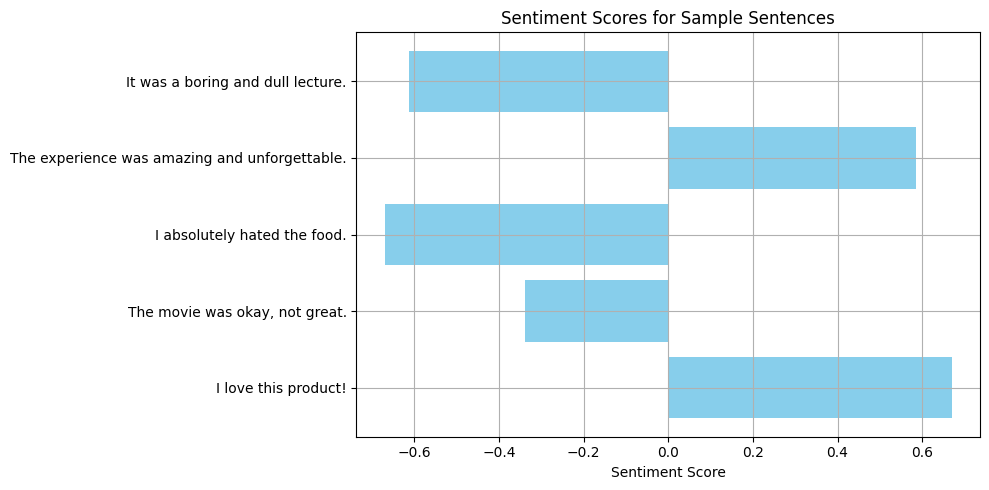

In [1]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download VADER lexicon (only once)
nltk.download('vader_lexicon')

# Create a sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Sample sentences
sentences = [
    "I love this product!",
    "The movie was okay, not great.",
    "I absolutely hated the food.",
    "The experience was amazing and unforgettable.",
    "It was a boring and dull lecture."
]

# Analyze sentiment for each sentence
results = []

for sentence in sentences:
    score = sia.polarity_scores(sentence)
    results.append((sentence, score))

# Display the results
for sentence, score in results:
    sentiment = (
        "Positive" if score['compound'] > 0.05 else
        "Negative" if score['compound'] < -0.05 else
        "Neutral"
    )
    print(f"\nSentence: \"{sentence}\"\nScore: {score}\nSentiment: {sentiment}")

# -----------------------------------------
# 🔹 Visualization: Sentiment Scores
labels = [s[0] for s in results]
scores = [s[1]['compound'] for s in results]

plt.figure(figsize=(10, 5))
plt.barh(labels, scores, color='skyblue')
plt.xlabel("Sentiment Score")
plt.title("Sentiment Scores for Sample Sentences")
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

# Load the Airline Passengers dataset (monthly passengers from 1949 to 1960)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, header=0, parse_dates=[0], index_col=0, squeeze=True)
df = df.rename('Passengers')

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(df, label='Monthly Passengers')
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.legend()
plt.show()

# ----------------------------------------
# 1. Time Series Decomposition
result = seasonal_decompose(df, model='multiplicative', period=12)  # Annual seasonality (12 months)
result.plot()
plt.show()

# ----------------------------------------
# 2. ARIMA Model (Auto ARIMA to choose p, d, q)
model = pm.auto_arima(df, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
print(f"Best ARIMA Order: {model.order}, Seasonal Order: {model.seasonal_order}")

# ----------------------------------------
# 3. Fit ARIMA Model
arima_model = ARIMA(df, order=model.order, seasonal_order=model.seasonal_order)
fitted_model = arima_model.fit()

# ----------------------------------------
# 4. Forecast Next 12 Months
forecast_steps = 12
forecast = fitted_model.forecast(steps=forecast_steps)
forecast_index = pd.date_range(df.index[-1] + pd.Timedelta(days=31), periods=forecast_steps, freq='M')

# Plotting actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df, label='Actual Data')
plt.plot(forecast_index, forecast, color='red', label='Forecasted Data')
plt.title(f"ARIMA Forecast for Next {forecast_steps} Months")
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------------------
# 5. Evaluating the Model (Residuals)
residuals = fitted_model.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


ModuleNotFoundError: No module named 'pmdarima'